## 1. Package Installing
Use pip to install the necessary Python packages for data analysis and machine learning: "lifetimes," "seaborn," and "scikit-learn."

In [ ]:
%pip install lifetimes
%pip install seaborn
%pip install scikit-learn

## 2. Importing Essential Libraries

This section imports crucial Python libraries for various tasks:
- "lifetimes" for Customer Lifetime Value (CLV) analysis
- pandas and numpy for data handling and manipulation
- datetime for working with dates and times
- matplotlib and seaborn for creating visualizations
- preprocessing tools from scikit-learn for data preparation in machine learning

In [2]:
import lifetimes

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from lifetimes import BetaGeoFitter, GammaGammaFitter
from sklearn.preprocessing import MinMaxScaler

## 3. Data Understanding

### a) Data Overview

In [3]:
df = pd.read_csv("online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### b) Data Information

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The dataset is structured as a Pandas DataFrame, comprising 541,909 entries across 8 columns. It includes a mix of data types such as text (object), integers (int64), and decimal numbers (float64). There are some incomplete entries in the 'Description' and 'CustomerID' fields.

### c) Summary Statistics

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


This summary provides key statistics for the 'Quantity,' 'UnitPrice,' and 'CustomerID' columns in the dataset. These metrics offer insights into:
- Central tendency (average values)
- Data dispersion (spread of values)
- Presence of extreme values (potential outliers)

Such information is valuable for making informed decisions in areas such as:
- managing inventory levels
- developing pricing strategies
- creating customer segments for targeted marketing

## 4. Data Manipulation

### a) Removing unwanted records

This data cleaning process focuses on removing problematic entries from the dataset:
- Excluding transactions with 0 or negative quantities
- Filtering out items with 0 or negative unit prices
- Removing records where the 'InvoiceNo' contains "C", which typically indicates returned items

The purpose of this data refinement is to:
- Eliminate invalid or irrelevant records
- Ensure the dataset only contains legitimate, positive transactions
- Prepare a clean foundation for more accurate and meaningful analysis

By focusing on valid sales data, this step helps to improve the reliability and relevance of subsequent analytical insights.

In [4]:
# Remove transactions with 0 or negative quantities
df = df[df['Quantity'] > 0]

# Filter out items with 0 or negative unit prices
df = df[df['UnitPrice'] > 0]

# Remove records where the 'InvoiceNo' contains "C"
df = df[~df['InvoiceNo'].str.contains('C')]

In [5]:
# New number of rows
df.shape[0]

530104

### b) Removing null values

We've identified that some null values in CustomerID. To ensure data completeness and consistency, we'll remove those.

In [6]:
df.dropna(inplace=True)

In [7]:
# Updated data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


# 5. Handling Outliers

### a) Define function to remove outliers

In [12]:
# i) Using the clip method:
    # all values lower than lower bound is replaced with lower bound
    # all values higher than upper bound is replaced with upper bound

def cap_outliers(dataframe, variable, q1=0.05, q2=0.95):
    lower_bound = dataframe[variable].quantile(q1)
    upper_bound = dataframe[variable].quantile(q2)
    dataframe[variable] = np.clip(dataframe[variable], lower_bound, upper_bound)

# ii) Calling functions
cap_outliers(df, 'UnitPrice')
cap_outliers(df, 'Quantity')

In [13]:
# Updated summary statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,8.868022,2.675785,15294.423453
std,9.523425,2.275053,1713.141560
min,1.000000,0.420000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,36.000000,8.500000,18287.000000


# 6. Constructing the RFM (Recency, Frequency, Monetary) Dataset

After data preprocessing, we now create an RFM dataset to analyze customer behavior:
- Frequency: Number of repeat purchases, defined as the count of time periods with customer activity.
- Recency: Time since the customer's most recent purchase, measured from their first purchase.
- T: Customer's total engagement period, from first purchase to the study's end date.
- Monetary Value: Average purchase value, calculated as total purchase amount divided by number of purchases.

This code uses the Lifetimes library to compute these RFM metrics for each customer:
- It transforms raw transaction data into a structured RFM format.
- The resulting dataset quantifies each customer's purchasing patterns and value.

This RFM dataset forms the foundation for:
- Advanced customer segmentation
- Predictive modeling of customer lifetime value
- Tailored marketing strategies

In [17]:
# a) Create new column: Total Price for customers purchases
df['Total Price'] = df['Quantity'] * df['UnitPrice']

In [18]:
# Functions from 'lifetimes' package, to summarize transaction data
# summary = summary_data_from_transaction_data(
#    df, 
#    'CustomerID', 
#    'InvoiceDate', 
#    observation_period_end='yyyy-mm-dd'
#    )

In [19]:
# b) Apply the above function in our RFM Model
RFM = lifetimes.utils.summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', 'Total Price', observation_period_end='2011-12-09')

# Display
RFM.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,550.570000
12348.0,3.0,283.0,358.0,116.126667
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [21]:
# c) Say, we're ONLY tracking customers who shopped twice or more
RFM = RFM[RFM['frequency']>=2]

# Display
RFM.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12347.0,6.0,365.0,367.0,550.570000
12348.0,3.0,283.0,358.0,116.126667
12352.0,6.0,260.0,296.0,192.840000
12356.0,2.0,303.0,325.0,226.080000
12359.0,3.0,274.0,331.0,1495.650000


# 7. Analyzing Customer Behavior with Frequency/Recency and the BG/NBD Model
This step uses the Lifetimes library and the Bayesian-Gamma Negative Binomial Distribution (BG/NBD) model to analyze customer purchasing patterns.
Similar to tracking how often a friend visit a favorite coffee shop and when they last came. This analysis helps identify the most loyal and active customers.

The BG/NBD model examines:
- How often customers buy (frequency)
- How recently they last bought (recency)
- The total time period being studied (T)

By applying this model to our RFM data, we can:
- Predict future customer behavior
- Identify patterns in purchase frequency and timing
- Segment customers based on their activity levels

This analysis provides valuable insights for:
- Targeted marketing strategies
- Customer retention efforts
- Forecasting future sales

The BG/NBD model helps transform raw purchase data into actionable business intelligence, allowing for more informed decision-making in customer relationship management.

In [22]:
bgf = BetaGeoFitter(penalizer_coef=0.0)  # Create a BG/NBD model instance
bgf.fit(RFM['frequency'], RFM['recency'], RFM['T'])  # Fit the model with the data

<lifetimes.BetaGeoFitter: fitted with 1916 subjects, a: 0.02, alpha: 113.56, b: 13.28, r: 2.44>

We can now Forecast Future Customer Purchases!

After fitting the BG/NBD model to our data, we can now use it to estimate future customer behavior. Specifically, we can predict the number of purchases each customer is likely to make in the coming months.

Key points:
- The model uses past behavior to project future actions
- We're looking ahead 6 months in this example
- Predictions are made for each individual customer

# 8. Expected Number of Purchases within 6 Months
To predict the expected number of purchases each customer is likely to make within the next 6 months, use the fitted BG/NBD model, which was named 'bgf'.

In [25]:
# Predict future customer transactions (let's say for the next 6 months)
predicted_purchases = bgf.predict(6, RFM['frequency'], RFM['recency'], RFM['T'])

# Display the predicted purchases for each customer
RFM['predicted_purchases'] = predicted_purchases
print(RFM[['frequency', 'recency', 'T', 'predicted_purchases']].head())

            frequency  recency      T  predicted_purchases
CustomerID                                                
12347.0           6.0    365.0  367.0             0.105275
12348.0           3.0    283.0  358.0             0.069025
12352.0           6.0    260.0  296.0             0.123399
12356.0           2.0    303.0  325.0             0.060655
12359.0           3.0    274.0  331.0             0.073253


In [45]:
# Find customers with predicted purchases of 1 or more
RFM2 = RFM[RFM['predicted_purchases']>=1]
RFM2.count()

frequency              5
recency                5
T                      5
monetary_value         5
predicted_purchases    5
dtype: int64

Text(0, 0.5, 'Number of Customers')

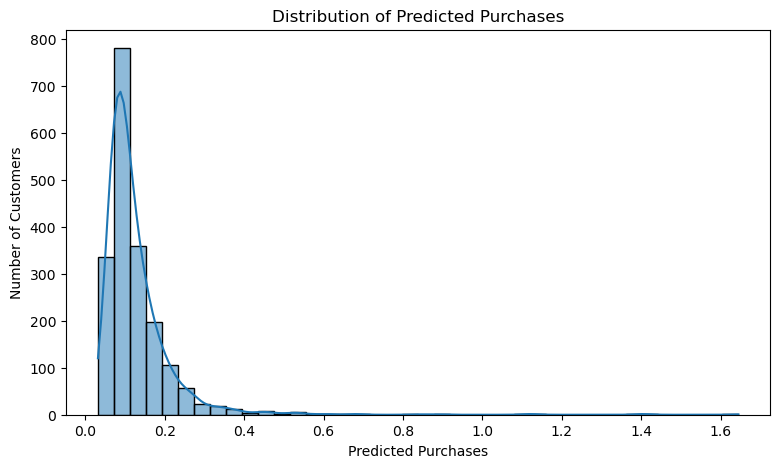

In [47]:
# Verify the low predicted purchases with a plot overview
plt.figure(figsize=(20, 5))

# Bar Plot
plt.subplot(1, 2, 1)
sns.histplot(RFM['predicted_purchases'], kde=True, bins=40)
plt.title('Distribution of Predicted Purchases')
plt.xlabel('Predicted Purchases')
plt.ylabel('Number of Customers')

# 9. Gamma-Gamma Model
The Gamma-Gamma model is used to predict the monetary value for each transaction.

In [48]:
# Fit the Gamma-Gamma model to the data (assuming we have 'monetary_value' column)
ggf = GammaGammaFitter(penalizer_coef=0.0)  # Adjust the penalizer_coef if needed
ggf.fit(RFM['frequency'], RFM['monetary_value'])

# Predict the expected monetary value for each transaction
predicted_monetary_value = ggf.conditional_expected_average_profit(RFM['frequency'], RFM['monetary_value'])

# Display the predicted monetary value for each transaction
RFM['predicted_monetary_value'] = predicted_monetary_value
print(RFM[['frequency', 'monetary_value', 'predicted_monetary_value']].head())

            frequency  monetary_value  predicted_monetary_value
CustomerID                                                     
12347.0           6.0      550.570000                491.654326
12348.0           3.0      116.126667                234.757676
12352.0           6.0      192.840000                246.672131
12356.0           2.0      226.080000                305.858551
12359.0           3.0     1495.650000                953.088382


# 10. Predicting CLV for the Next 6 Months
To predict Customer Lifetime Value (CLV) for the next 6 months, we combine the predictions from the BG/NBD and Gamma-Gamma models.

In [49]:
# Calculate the CLV prediction for each customer
RFM['predicted_CLV'] = RFM['predicted_purchases'] * RFM['predicted_monetary_value']

# Display the predicted CLV for each customer
print(RFM[['predicted_CLV']].head())

            predicted_CLV
CustomerID               
12347.0         51.758707
12348.0         16.204207
12352.0         30.439010
12356.0         18.551746
12359.0         69.816407


#  11. Segmenting Customers by Customer Lifetime Value (CLV)
Customers can be segmented into various groups based on their Customer Lifetime Value (CLV) using different techniques, such as quantiles or clustering algorithms.
In this case, we will segment customers into four groups based on their predicted CLV using quantiles. 
However, we can modify the number of quantiles or apply alternative segmentation methods to suit our needs.

In [52]:
# Segment customers into quantiles based on predicted CLV
RFM['Segment'] = pd.qcut(RFM['predicted_CLV'], q=4, labels=['Hibernating', 'Need Attention', 'Loyal Customers', 'Champions'])

# Display the CLV quantile for each customer
RFM.head()

,frequency,recency,T,monetary_value,predicted_purchases,predicted_monetary_value,predicted_CLV,Segment
CustomerID,,,,,,,,
12347.0,6.0,365.0,367.0,550.570000,0.105275,491.654326,51.758707,Champions
12348.0,3.0,283.0,358.0,116.126667,0.069025,234.757676,16.204207,Hibernating
12352.0,6.0,260.0,296.0,192.840000,0.123399,246.672131,30.439010,Need Attention
12356.0,2.0,303.0,325.0,226.080000,0.060655,305.858551,18.551746,Hibernating
12359.0,3.0,274.0,331.0,1495.650000,0.073253,953.088382,69.816407,Champions


# 12. Grouped Data:
After segmenting customers, we can analyze and compare their behavior and characteristics within each segment. 
Let's group our dataset by the 'Segment' column!

In [53]:
RFM.groupby('Segment').mean()

,frequency,recency,T,monetary_value,predicted_purchases,predicted_monetary_value,predicted_CLV
Segment,,,,,,,
Hibernating,2.887265,236.342380,314.776618,184.460644,0.074100,272.986569,19.634967
Need Attention,3.995825,240.048017,282.870564,288.097725,0.097324,315.073218,28.962636
Loyal Customers,5.087683,224.202505,255.139875,387.433829,0.124657,368.076314,42.133573
Champions,12.144050,265.471816,279.501044,565.476698,0.215625,501.891978,104.777340


# 13. Leveraging Customer Segments for Strategic Action

Now that we've categorized customers based on their Customer Lifetime Value (CLV), we can develop targeted strategies:

1. Tailored Product Offerings:
   - Design specific product recommendations for each CLV segment
   - Match product features and pricing to segment characteristics

2. CLV Enhancement for Lower Segments:
   - Create marketing initiatives aimed at increasing the value of customers in lower CLV groups
   - Implement loyalty programs or incentives to encourage more frequent purchases

3. Focus on High-Value Segments:
   - Concentrate resources on retaining and nurturing high CLV customers
   - Develop strategies to acquire new customers with similar profiles to high CLV segments

This segmentation-based approach allows for:
- More efficient resource allocation
- Personalized customer experiences
- Potential reduction in customer acquisition costs
- Improved overall customer retention and lifetime value

By aligning business strategies with customer value segments, companies can optimize their marketing efforts and enhance long-term profitability.